<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 4.1 - Intro To Networks

### Thomas Derr

In [ ]:
import networkx as nx

### Graph Models

A graph $G$ with nodes $V = \{v_1, v_2,...,v_n\}$edges $E = \{e_1, e_2, ..., e_n\}$ is denoted as $G(V,E)$. Its size is denoted as $m = |E|$. Edges are represented as a function of their endpoints, For example, $e(v_1,v_2)$ is the edge between $v_1$ and $v_2$. In an undirected graph, edges are connected both ways. Conversely, in a directed graph, an edge only denotes a one way connection. A mixed graph may be made up of both directed and undirected edges


We can think of edges as paths by which we can travel to traverse the graph. Depending on how the nodes are connected, a path that is closed, i.e., when following it, we never repeat the same node until we find ourselves back at our starting node, is called a cycle. A neighborhood can be defined as the set of nodes within a defined number $n$ "hops" of some node $v_i$, we call this neighborhood an $n$-hop neighborhood depending on the value of $n$. The ammount of edges connected to a node is its degree. The higher a node's degree, the greater its centrality. Depending on the context, degree can give different to a node. For example, on a graph of airports in the U.S., airports with many routes can be thought of as nodes with high degree. Oftentimes the shortest path between 2 airports without a direct flight between them will involve going through one of these high degree nodes.

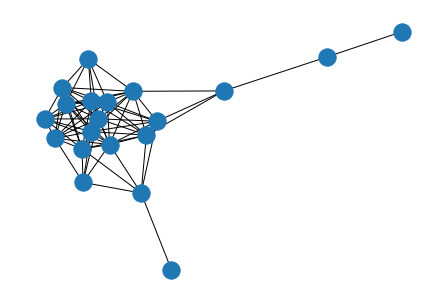

In [ ]:
G = nx.random_geometric_graph(20, 0.375)

nx.draw(G)

### Laplacian Matrix

An $n$ node graph can be represented by an $n\times n$ adjacency matrix. A non-zero value at some index $\{i,j\}$ in the matrix indictates a connection from the $i$th node to the $j$th node in the graph. In general, undirected graphs are symetric, as connections go both ways. In a directed graph, the matrix is usually not symetric however, as there may only be a one way connection between two nodes. Additionally, in a weighted graph, the weights of the edges can be represented in the matrix by simply encoding the value of the weight as the non zero value. If the graph is unweighted the matrix will only contain 0s and 1s.

The laplacian matrix $L$ of graph $G$ is defined as


$L_{ij} = \begin{cases}\sum_kE_{ik}, & i=j,\\
-E_{ij}, & i\neq j, \text{ and } v_i \text{ is adjaent to } v_i, \\ 0, & \text{otherwise}\end{cases}$


The laplacian matrix has the following properties.

1. $L = D-M$, where $M$ is the adjacency matrix and $D$ is the diagonal degree matrix with $D_{ii} = \sum_kE_{ik}$.
2. $L = I_GI_G^T$
3. $L$ is symetric positive semi-definite. All eigenvaluses of $L$ are real and non-negative, and $L$ has a full set of $n$ real and orthogonal eigenvectors.
4. Let $e = [1, ..., 1]^T$. Then $Le=0$, Thus $0$ is the smallest eigenvalue and $e$ is the corresponding eigenvector
5. If the graph $G$ has $c$ connected components, then $L$ has $c$ eigenvaluess that are $0$.
6. For any vector $x$, $x^TLx = \sum_{\{i,j\}\in E}E_{ij}(x_i-x_j)^2$
7. For any vector $x$ and scalars $\alpha, \beta, (\alpha x + \beta e)^TL(\alpha x + \beta e) = \alpha^2x^TLx$
8. We can solve for $\min_{x\neq 0}x^TLx$, where $x^Tx = 1$ and $x^Te=0$ by finding the second smallese eigenvalue $\lambda_2$ of the eigenvalue problem $Lx = \lambda x$


Below is the Laplacian matrix for our above graph

In [ ]:
L = nx.laplacian_matrix(G).toarray()
print(L)

[[12  0 -1 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1  0 -1  0]
 [ 0 11 -1  0 -1  0 -1 -1  0 -1  0 -1 -1  0 -1 -1  0  0 -1 -1]
 [-1 -1 10  0 -1  0 -1 -1  0 -1  0 -1 -1  0  0  0 -1  0  0 -1]
 [-1  0  0  6  0  0  0 -1  0  0  0 -1 -1 -1  0  0 -1  0  0  0]
 [ 0 -1 -1  0  4  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [-1 -1 -1  0  0  0 13 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1]
 [-1 -1 -1 -1  0  0 -1 13  0 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1]
 [ 0  0  0  0 -1  0  0  0  2  0  0  0  0  0  0  0  0 -1  0  0]
 [-1 -1 -1  0  0  0 -1 -1  0 13 -1 -1 -1 -1 -1 -1  0  0 -1 -1]
 [-1  0  0  0  0  0 -1 -1  0 -1  9 -1 -1 -1 -1  0  0  0 -1  0]
 [-1 -1 -1 -1  0  0 -1 -1  0 -1 -1 14 -1 -1 -1 -1  0  0 -1 -1]
 [-1 -1 -1 -1  0  0 -1 -1  0 -1 -1 -1 13 -1 -1  0 -1  0  0 -1]
 [-1  0  0 -1  0  0 -1 -1  0 -1 -1 -1 -1 10 -1  0  0  0 -1  0]
 [-1 -1  0  0  0  0 -1 -1  0 -1 -1 -1 -1 -1 11 -1  0  0 -1  0]
 [ 0 -1  0  0  0  0 -1  0  0 -1  0 -1  0  0 -1  6  0  0